Read up on:

*   Feature Mapping
*   Pooling
*   
*   



In [4]:
 import tensorflow as tf
 from tensorflow.keras import datasets, layers, models
 import matplotlib.pyplot as plt

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255., test_images/255.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 2s 0us/step


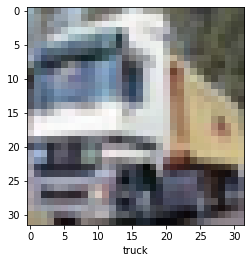

In [6]:
IMG_INDEX =1

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

Build a Convolutional Neural Network Architecture

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Adding Dense Layers

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Training the Model (using tensorflow compiler)

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 81s 51ms/step - loss: 1.5692 - accuracy: 0.4289 - val_loss: 1.3194 - val_accuracy: 0.5220
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.2068 - accuracy: 0.5716 - val_loss: 1.1183 - val_accuracy: 0.6116
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0574 - accuracy: 0.6285 - val_loss: 1.0412 - val_accuracy: 0.6383
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9690 - accuracy: 0.6597 - val_loss: 1.0142 - val_accuracy: 0.6488
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8910 - accuracy: 0.6883 - val_loss: 0.9411 - val_accuracy: 0.6749
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8305 - accuracy: 0.7086 - val_loss: 0.9255 - val_accuracy: 0.6770
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7757 - accuracy: 0.7257 - val_loss: 0.9114 -

Evaluating the Model

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose= 2)
test_acc

313/313 - 4s - loss: 0.8852 - accuracy: 0.7028 - 4s/epoch - 12ms/step


0.7027999758720398